In [3]:
from ptycho.multires.class_multiressolver import *
import matplotlib.pyplot as plt
import torch.nn.functional as func
import torch
from ptycho.tools.ptychography import Ptychography2_v2 as Ptychography2
np.random.seed(0)
torch.manual_seed(0)


/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
scale = 9
image = plt.imread('images/peppers.jpg')[:2**scale-1, :2**scale-1] / 255


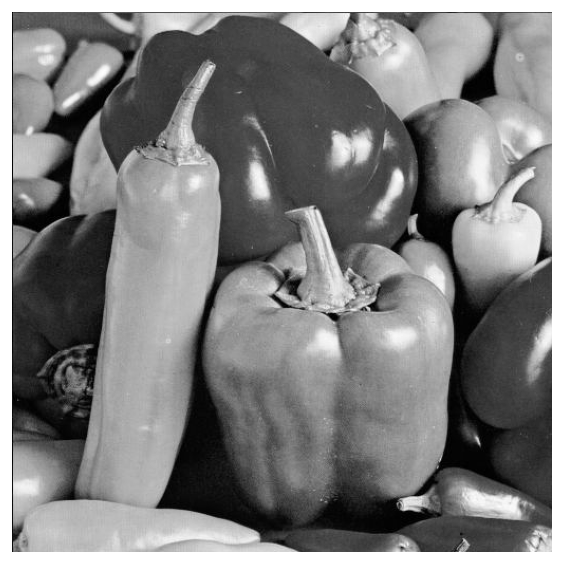

In [8]:
plt.figure(dpi = 120)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig("side_figs/peppers.png")


In [ ]:
max_scale = 7
max_probe_size = 32
max_shift = 8
device = 'cuda'
I_in = 15*np.array([1, 15, 10, 5, 10, 30, 100])
I_out = 20*np.array([0, 0, 0, 30, 30,40,80])
cycle = [0, -1, -1, -1,  1, 1, 1]
lmbda = 0
LR = 1e-1
tol = [1e-10] * 9
tol_in = [1e-10] * 9

linOperator = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)

image = plt.imread('images/peppers_reduced.jpg')/ 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**max_scale, 2**max_scale)
x = torch.exp(1j * image_tensor)